In [40]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.utils import resample
from scipy.stats import chisquare
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from sklearn import feature_selection
import scipy.stats as st
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [41]:
df = pd.read_csv('hour.csv')

In [ ]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.shape

(17379, 17)

In [ ]:
df_dtypes = df.apply(lambda x: x.dtype).value_counts()
df_dtypes

,count
float64,5
int64,4
category,3
category,2
object,1
category,1
category,1
category,1
category,1


In [ ]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['dteday']

In [ ]:
df['hr'] = df['hr'].astype('category')
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [ ]:
##First, let's take a look at our dataset. 2010=0 and 2011=1 for year feature so we can understand that they are aprox same count
df.general_stats = df.describe()
df.general_stats.T.sort_values(by='std', ascending=False)

<ipython-input-12-a028ec5e8bf0>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.general_stats = df.describe()


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507


In [ ]:
##Summary of statistics ordered by st
stats_std = df.describe().T
stats_std.sort_values(by='std',ascending=False)

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_saleprice = correlation_matrix["cnt"].sort_values(ascending=False)
correlation_with_saleprice.head(10)

,cnt
cnt,1.000000
registered,0.972151
casual,0.694564
temp,0.404772
atemp,0.400929
instant,0.278379
windspeed,0.093234
hum,-0.322911


In [ ]:
max_cnt_value = df['cnt'].max()
max_cnt_value

977

In [ ]:
max_cnt_row = df[df['cnt'] == max_cnt_value]
max_cnt_row

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


In [ ]:
null_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()
null_values, duplicated_rows

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 np.int64(0))

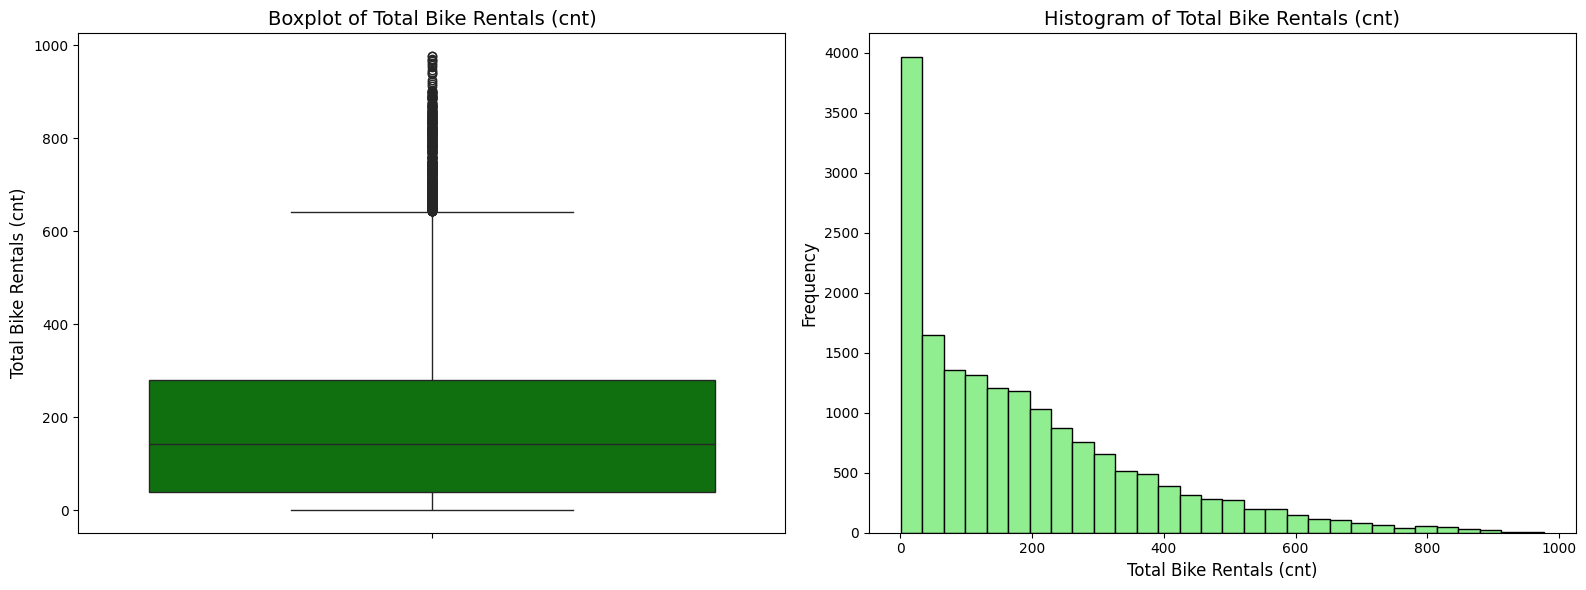

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[1].hist(df['cnt'], bins=30, edgecolor='black', color='lightgreen')
axes[1].set_title('Histogram of Total Bike Rentals (cnt)', fontsize=14)
axes[1].set_xlabel('Total Bike Rentals (cnt)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)


sns.boxplot(y=df['cnt'], color='green', ax=axes[0])
axes[0].set_title('Boxplot of Total Bike Rentals (cnt)', fontsize=14)
axes[0].set_ylabel('Total Bike Rentals (cnt)', fontsize=12)

plt.tight_layout()
plt.show()

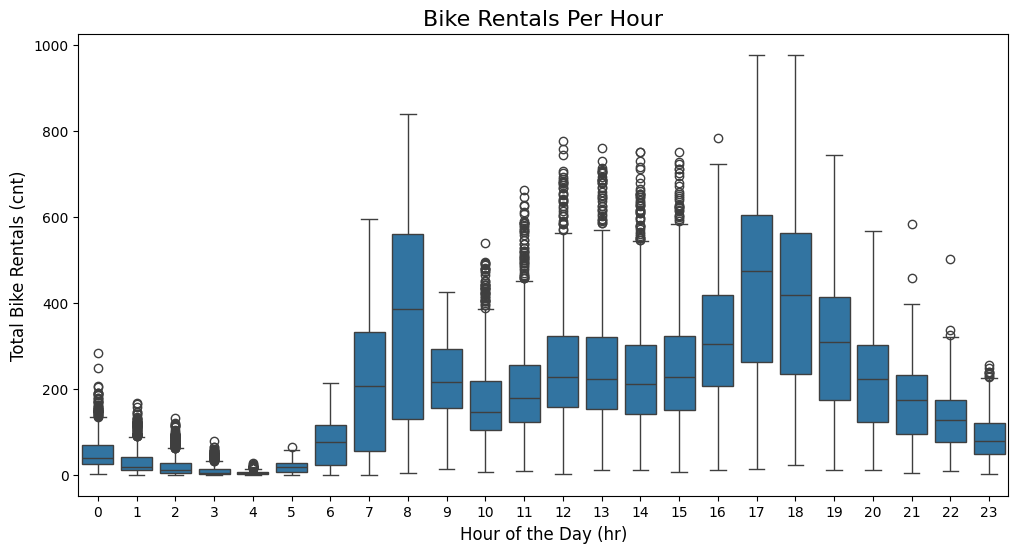

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Bike Rentals Per Hour', fontsize=16)
plt.xlabel('Hour of the Day (hr)', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.show()

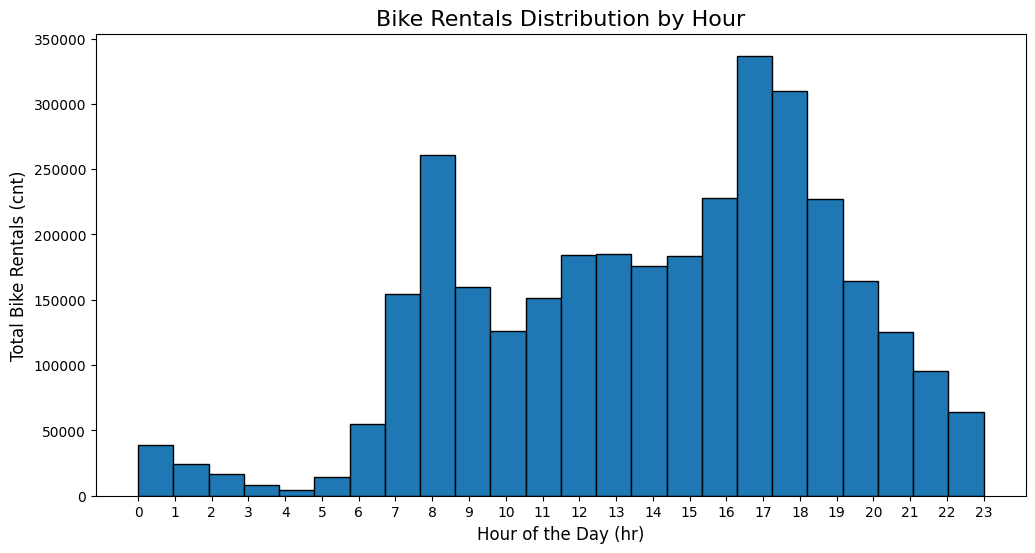

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df['hr'], bins=24, weights=df['cnt'], edgecolor='black')
plt.title('Bike Rentals Distribution by Hour', fontsize=16)
plt.xlabel('Hour of the Day (hr)', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.xticks(range(24))
plt.show()

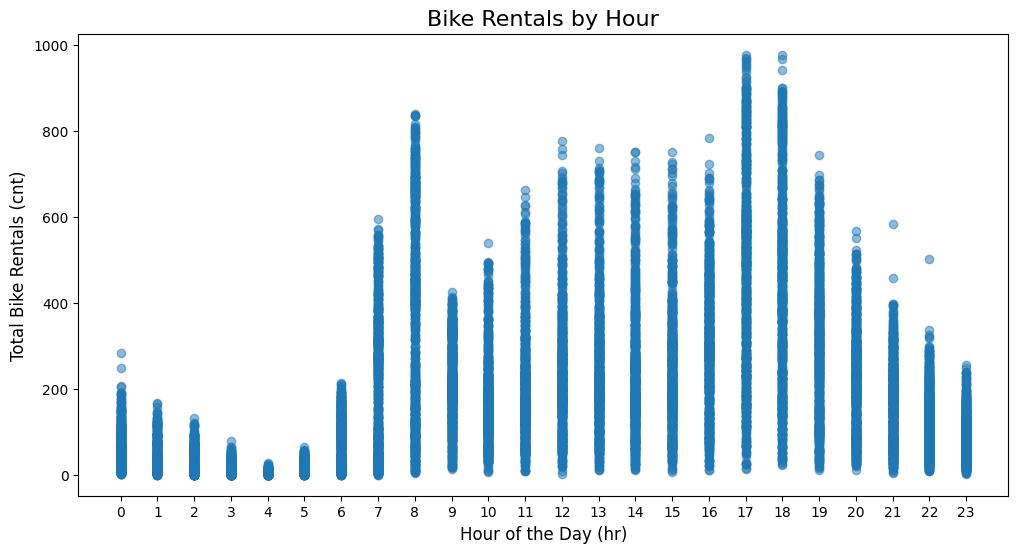

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['hr'], df['cnt'], alpha=0.5)
plt.title('Bike Rentals by Hour', fontsize=16)
plt.xlabel('Hour of the Day (hr)', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.xticks(range(24))
plt.show()

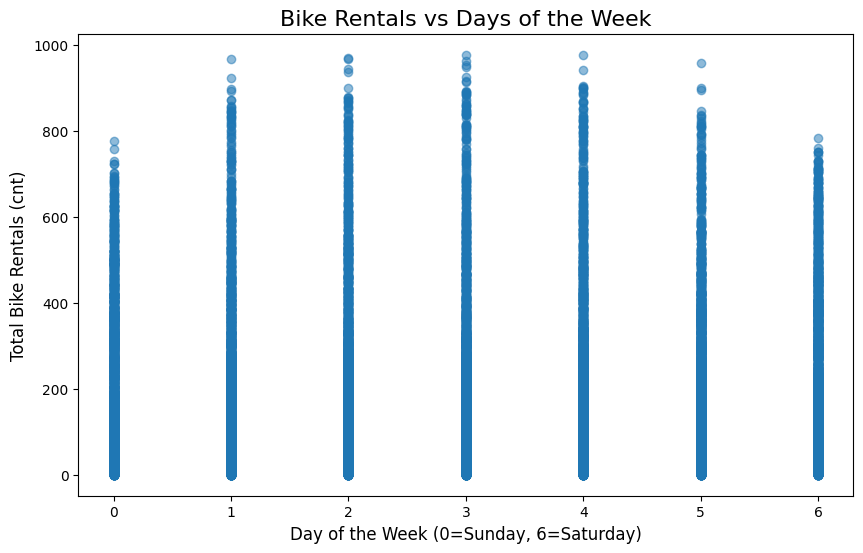

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['weekday'], df['cnt'], alpha=0.5)
plt.title('Bike Rentals vs Days of the Week', fontsize=16)
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.show()

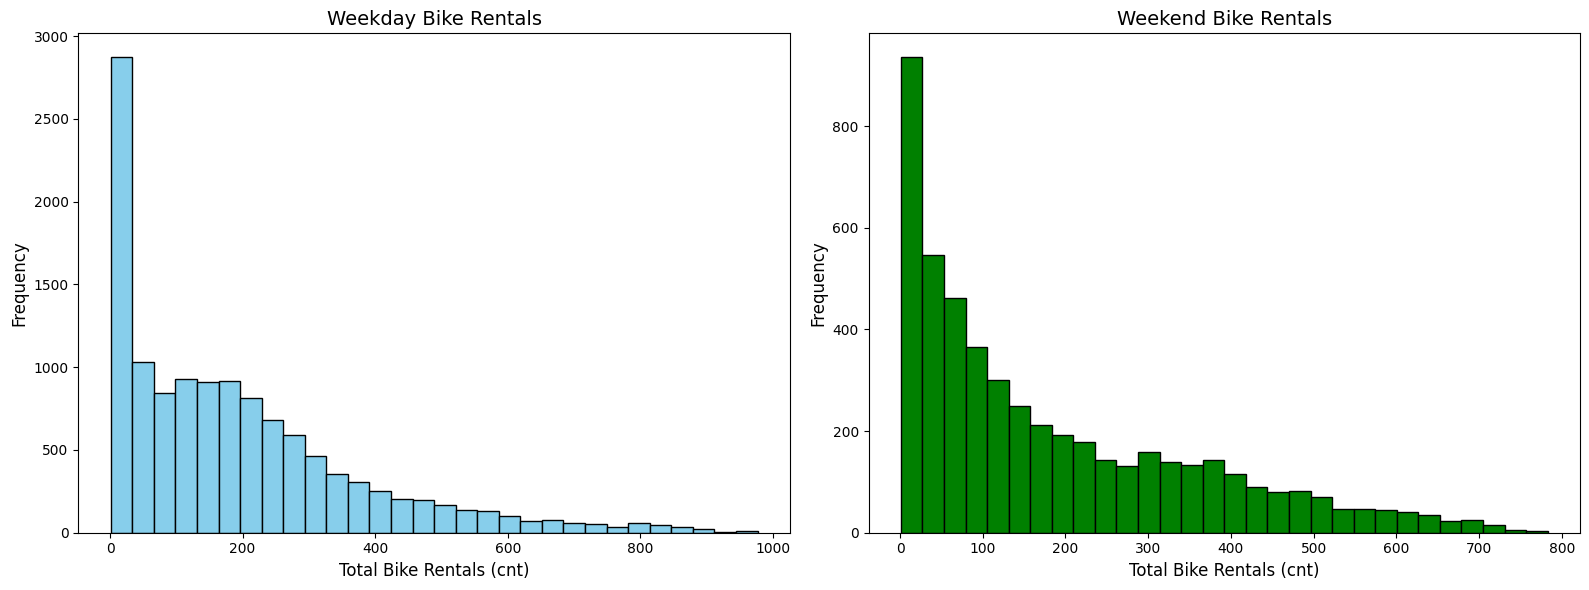

In [ ]:
weekday_data = df[df['weekday'].isin([1, 2, 3, 4, 5])]['cnt']

weekend_data = df[df['weekday'].isin([0, 6])]['cnt']


fig, axes = plt.subplots(1, 2, figsize=(16,6))


axes[0].hist(weekday_data, bins=30, edgecolor='black', color='skyblue')
axes[0].set_title('Weekday Bike Rentals', fontsize=14)
axes[0].set_xlabel('Total Bike Rentals (cnt)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)


axes[1].hist(weekend_data, bins=30, edgecolor='black', color='green')
axes[1].set_title('Weekend Bike Rentals', fontsize=14)
axes[1].set_xlabel('Total Bike Rentals (cnt)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()

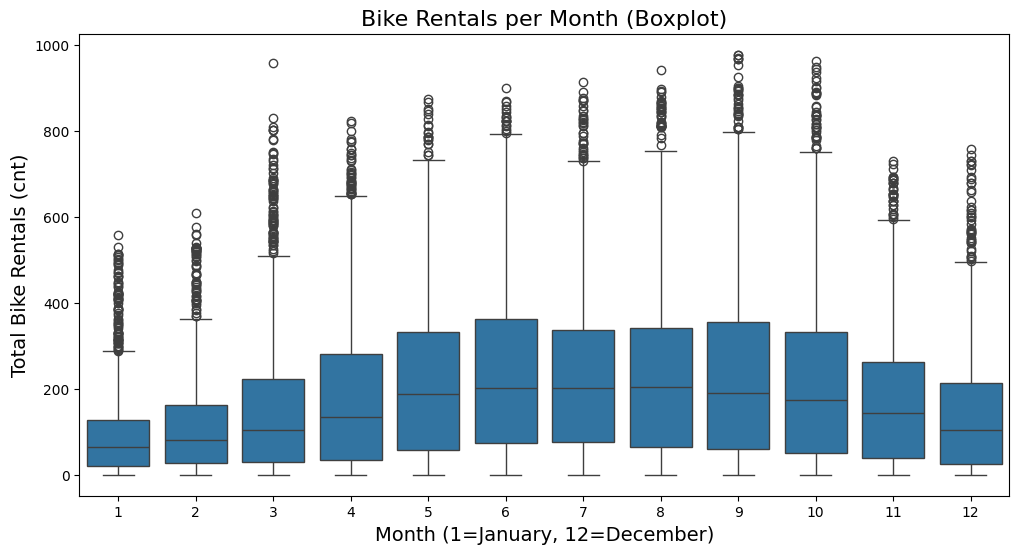

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Bike Rentals per Month (Boxplot)', fontsize=16)
plt.xlabel('Month (1=January, 12=December)', fontsize=14)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=14)
plt.show()

<ipython-input-26-9ea76fcc1dc8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temp_celsius_bins', y='cnt', data=df,palette='coolwarm')


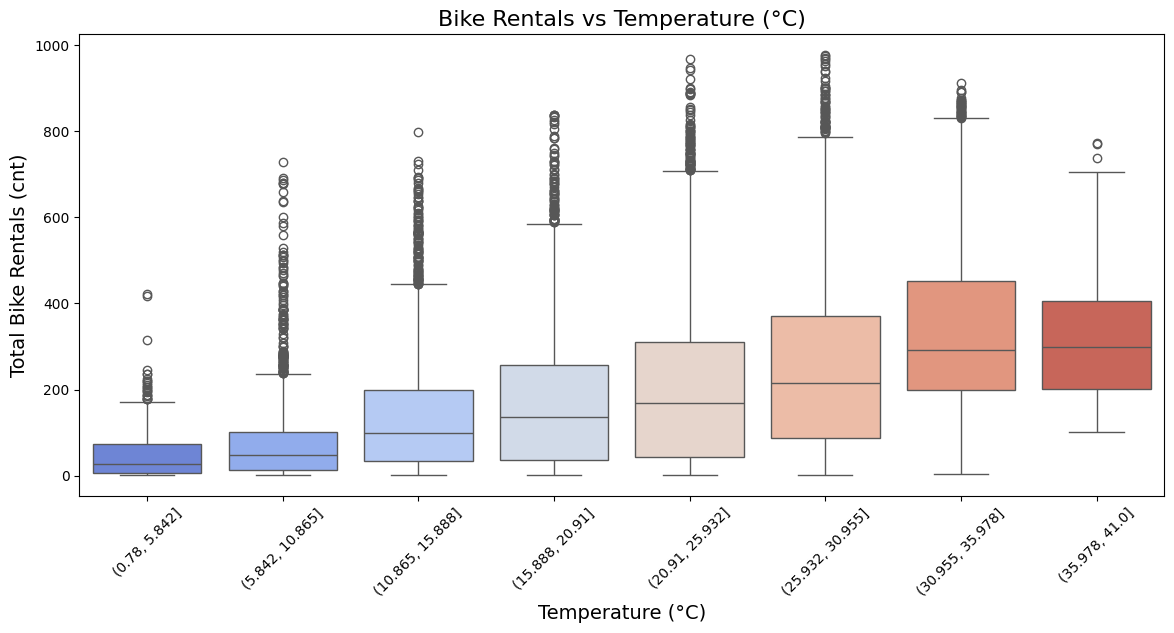

In [ ]:
df['temp_celsius'] = df['temp'] * 41


df['temp_celsius_bins'] = pd.cut(df['temp_celsius'], bins=8)


plt.figure(figsize=(14,6))
sns.boxplot(x='temp_celsius_bins', y='cnt', data=df,palette='coolwarm')
plt.title('Bike Rentals vs Temperature (°C)', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-95879a34831c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df, palette='coolwarm')


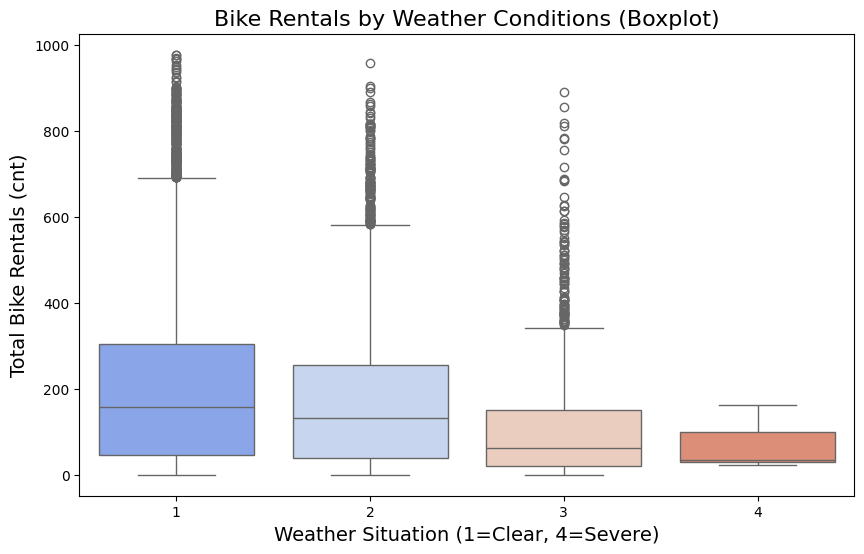

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette='coolwarm')
plt.title('Bike Rentals by Weather Conditions (Boxplot)', fontsize=16)
plt.xlabel('Weather Situation (1=Clear, 4=Severe)', fontsize=14)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=14)
plt.show()

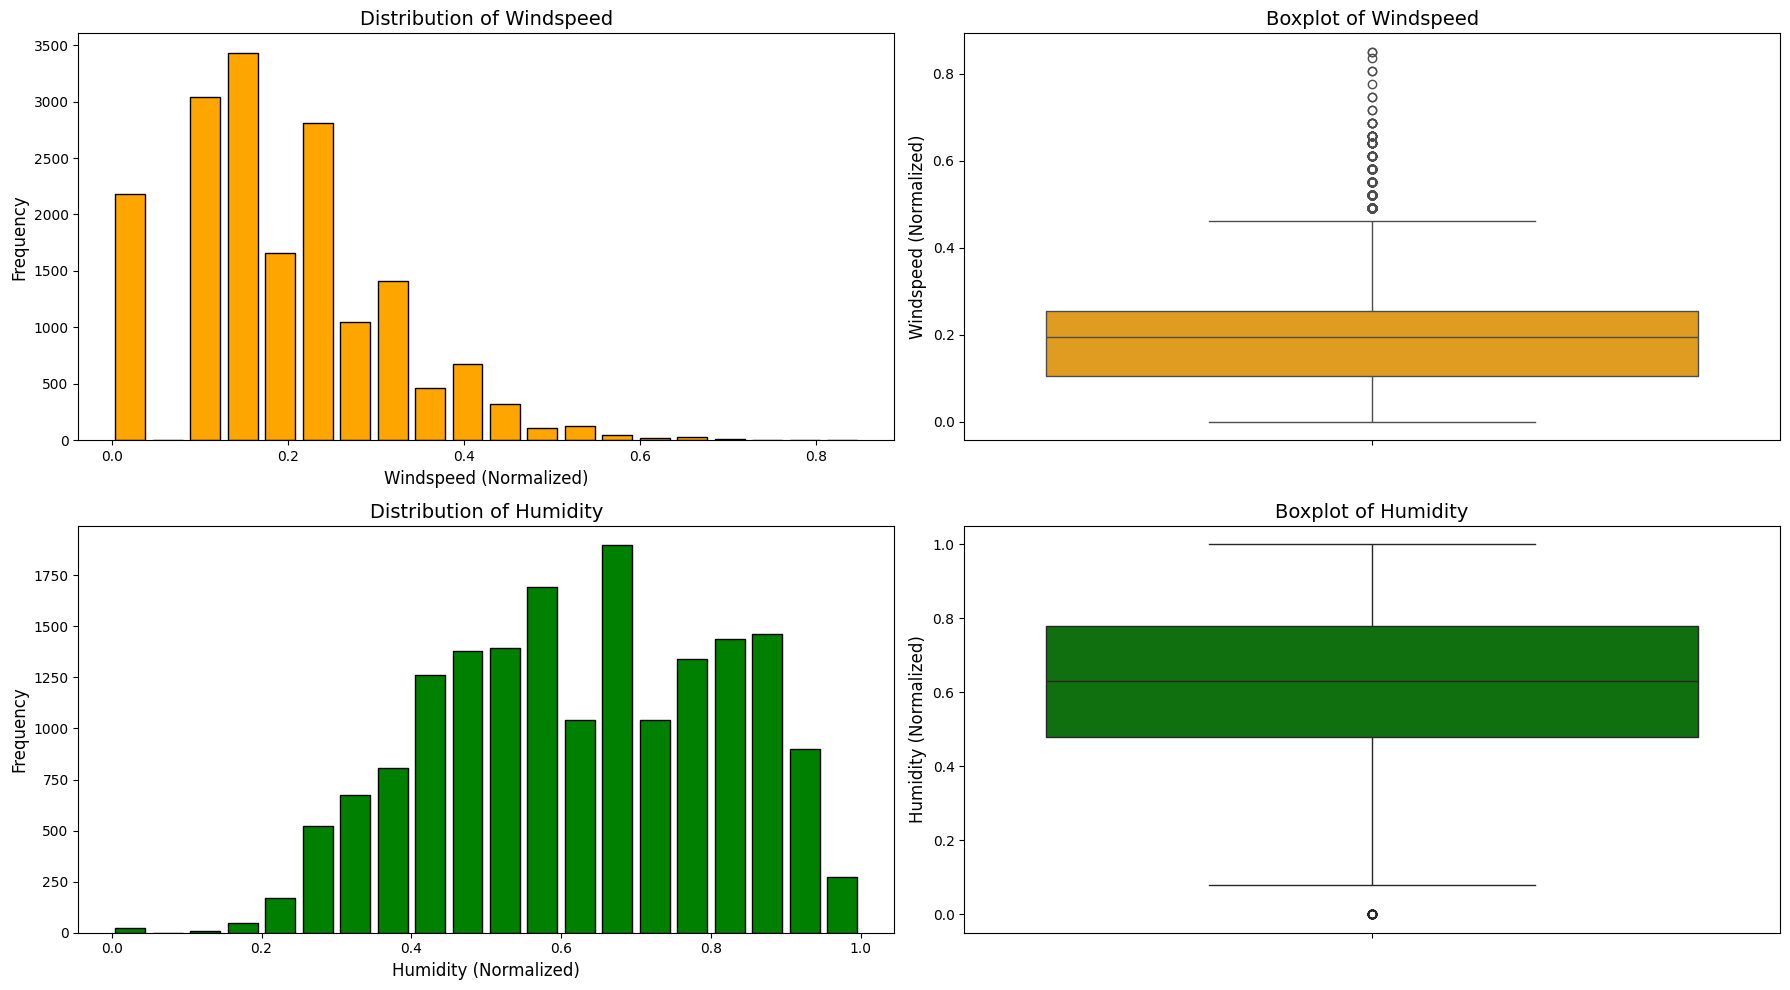

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))

axes[0,0].hist(df['windspeed'], bins=20, edgecolor='black', color='orange', rwidth=0.8)
axes[0,0].set_title('Distribution of Windspeed', fontsize=14)
axes[0,0].set_xlabel('Windspeed (Normalized)', fontsize=12)
axes[0,0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=df['windspeed'], color='orange', ax=axes[0,1])
axes[0,1].set_title('Boxplot of Windspeed', fontsize=14)
axes[0,1].set_ylabel('Windspeed (Normalized)', fontsize=12)

axes[1,0].hist(df['hum'], bins=20, edgecolor='black', color='green', rwidth=0.8)
axes[1,0].set_title('Distribution of Humidity', fontsize=14)
axes[1,0].set_xlabel('Humidity (Normalized)', fontsize=12)
axes[1,0].set_ylabel('Frequency', fontsize=12)


sns.boxplot(y=df['hum'], color='green', ax=axes[1,1])
axes[1,1].set_title('Boxplot of Humidity', fontsize=14)
axes[1,1].set_ylabel('Humidity (Normalized)', fontsize=12)

plt.tight_layout()
plt.show()

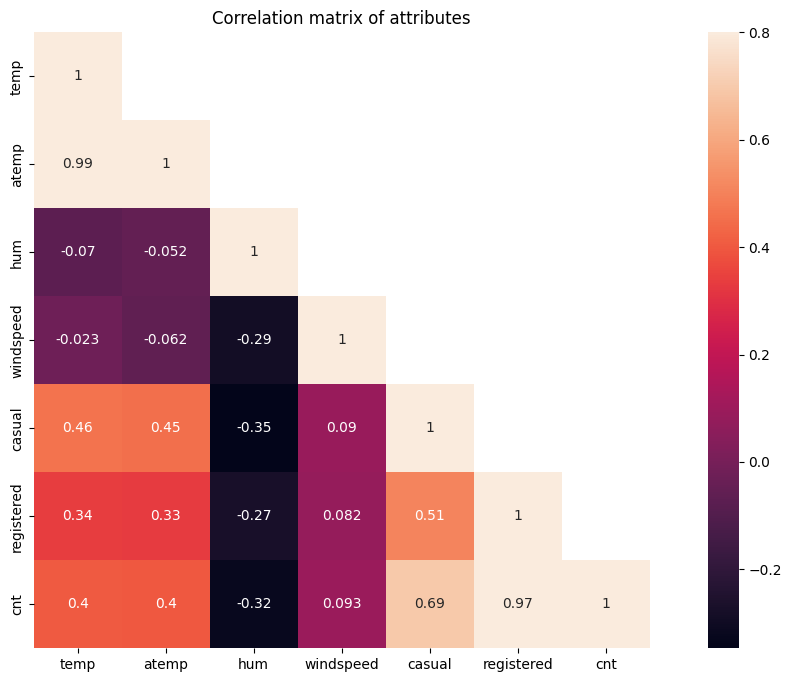

In [ ]:
correMtr=df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False

fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [43]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


kf_knn = KFold(n_splits=10, shuffle=True, random_state=42)


knn_best = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

mae_list_knn_best = []
rmse_list_knn_best = []
mape_list_knn_best = []


for train_index, test_index in kf_knn.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_best.fit(X_train, y_train)
    y_pred = knn_best.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    mae_list_knn_best.append(mae)
    rmse_list_knn_best.append(rmse)
    mape_list_knn_best.append(mape)


print("k-NN (k=5, metric=manhattan) - 10-Fold Cross Validation Results:")
print(f"Mean MAE:  {np.mean(mae_list_knn_best):.4f}")
print(f"Mean RMSE: {np.mean(rmse_list_knn_best):.4f}")
print(f"Mean MAPE: {np.mean(mape_list_knn_best):.2f}%")


k-NN (k=5, metric=manhattan) - 10-Fold Cross Validation Results:
Mean MAE:  32.6196
Mean RMSE: 51.7727
Mean MAPE: 0.39%


In [44]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


kf_dt = KFold(n_splits=10, shuffle=True, random_state=42)


dtree = DecisionTreeRegressor(max_depth=10, random_state=42)

mae_list_dt = []
rmse_list_dt = []
mape_list_dt = []

for train_index, test_index in kf_dt.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test))


    mae_list_dt.append(mae)
    rmse_list_dt.append(rmse)
    mape_list_dt.append(mape)


print("Decision Tree - 10-Fold Cross Validation Results:")
print(f"Mean MAE:  {np.mean(mae_list_dt):.4f}")
print(f"Mean RMSE: {np.mean(rmse_list_dt):.4f}")
print(f"Mean MAPE: {np.mean(mape_list_dt):.2f}%")


Decision Tree - 10-Fold Cross Validation Results:
Mean MAE:  35.8782
Mean RMSE: 59.1068
Mean MAPE: 0.39%


In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


kf_rf = KFold(n_splits=10, shuffle=True, random_state=42)


rf = RandomForestRegressor(
    random_state=42,

)

mae_list_rf = []
rmse_list_rf = []
mape_list_rf = []

for train_index, test_index in kf_rf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    mae_list_rf.append(mae)
    rmse_list_rf.append(rmse)
    mape_list_rf.append(mape)


print("Random Forest - 10-Fold Cross Validation Results:")
print(f"Mean MAE:  {np.mean(mae_list_rf):.4f}")
print(f"Mean RMSE: {np.mean(rmse_list_rf):.4f}")
print(f"Mean MAPE: {np.mean(mape_list_rf):.2f}%")

Random Forest - 10-Fold Cross Validation Results:
Mean MAE:  25.1814
Mean RMSE: 42.3441
Mean MAPE: 0.31%


In [46]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


gb_better = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)


kf_gb_better = KFold(n_splits=10, shuffle=True, random_state=42)


mae_list_gb_better = []
rmse_list_gb_better = []
mape_list_gb_better = []


for train_index, test_index in kf_gb_better.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gb_better.fit(X_train, y_train)
    y_pred = gb_better.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    mae_list_gb_better.append(mae)
    rmse_list_gb_better.append(rmse)
    mape_list_gb_better.append(mape)

print("Gradient Boosting - 10-Fold Cross Results:")
print(f"Mean MAE:  {np.mean(mae_list_gb_better):.4f}")
print(f"Mean RMSE: {np.mean(rmse_list_gb_better):.4f}")
print(f"Mean MAPE: {np.mean(mape_list_gb_better):.2f}%")


Gradient Boosting - 10-Fold Cross Results:
Mean MAE:  23.2114
Mean RMSE: 38.0736
Mean MAPE: 0.31%


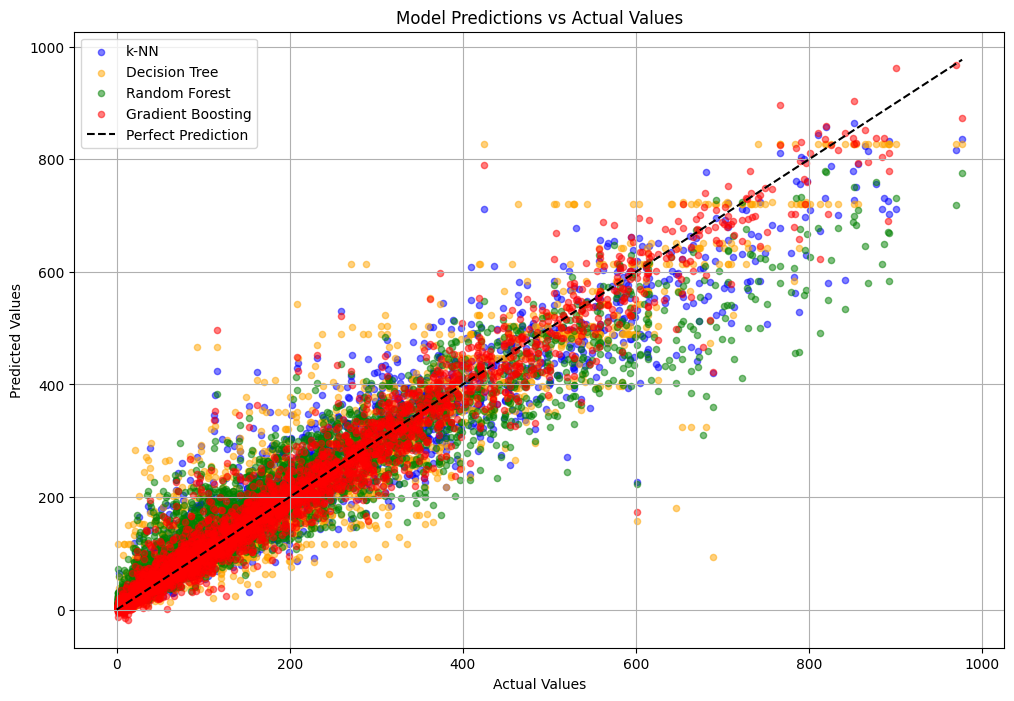

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor




X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "k-NN": KNeighborsRegressor(n_neighbors=5, metric='manhattan'),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor( n_estimators=500,
    max_depth=20,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500,
    learning_rate=0.1,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42)
}


predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


plt.figure(figsize=(12, 8))

colors = {'k-NN': 'blue', 'Decision Tree': 'orange', 'Random Forest': 'green', 'Gradient Boosting': 'red'}

for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5, s=20, color=colors[name])


perfect_line = np.linspace(0, max(y_test), 1000)
plt.plot(perfect_line, perfect_line, 'k--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


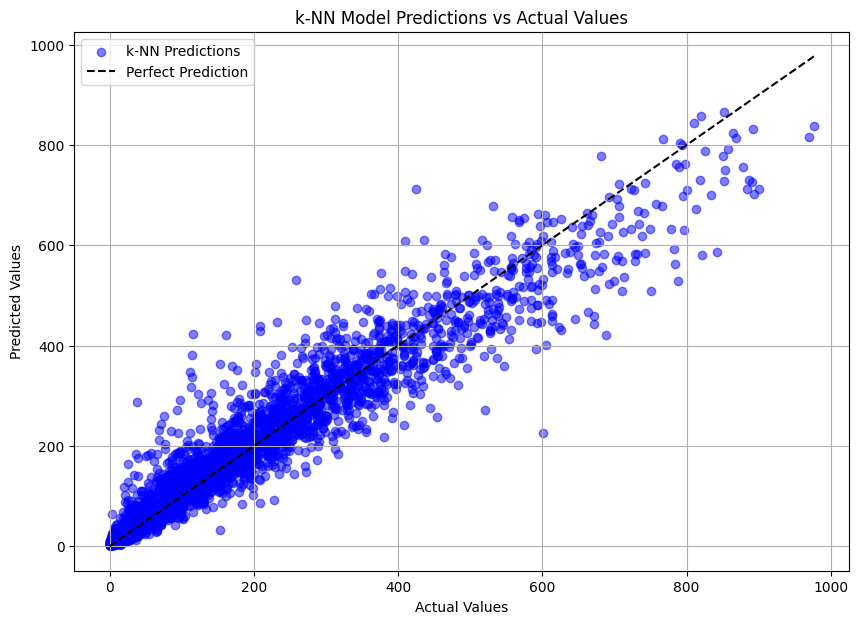

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='k-NN Predictions')


perfect_line = np.linspace(0, max(y_test), 1000)
plt.plot(perfect_line, perfect_line, 'k--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

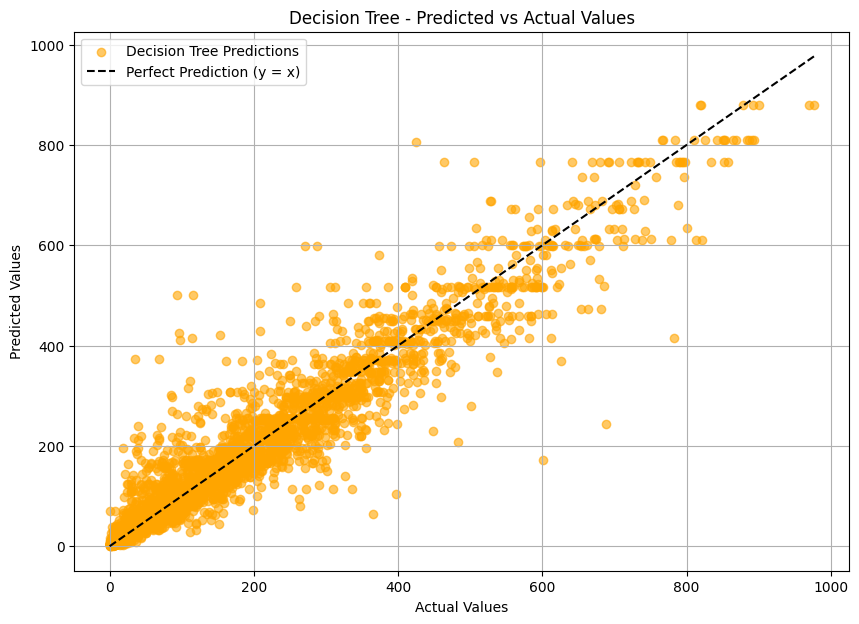

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree_better = DecisionTreeRegressor(
     max_depth=12,
    min_samples_leaf=8,
    min_samples_split=15,
    random_state=42
)
dtree_better.fit(X_train, y_train)
y_pred = dtree_better.predict(X_test)


plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', label='Decision Tree Predictions')


perfect_line = np.linspace(0, max(y_test), 1000)
plt.plot(perfect_line, perfect_line, 'k--', label='Perfect Prediction (y = x)')

plt.title('Decision Tree - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


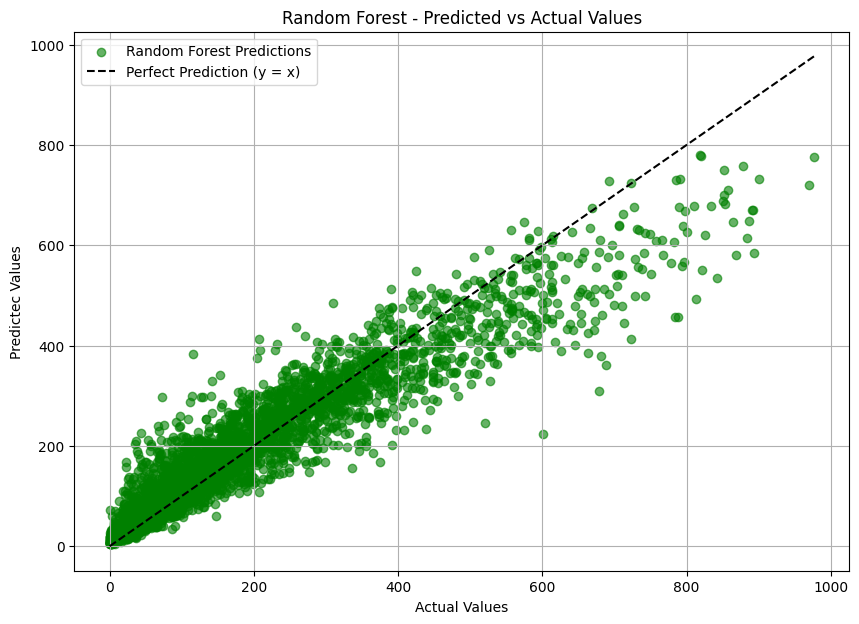

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
     n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Random Forest Predictions')


perfect_line = np.linspace(0, max(y_test), 1000)
plt.plot(perfect_line, perfect_line, 'k--', label='Perfect Prediction (y = x)')

plt.title('Random Forest - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictec Values')
plt.legend()
plt.grid(True)
plt.show()


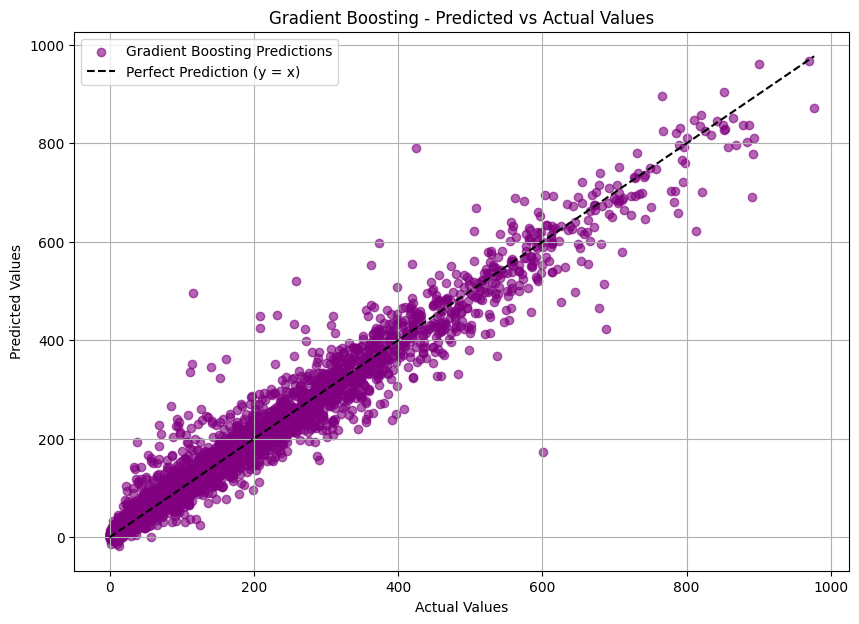

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = df['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='purple', label='Gradient Boosting Predictions')


perfect_line = np.linspace(0, max(y_test), 1000)
plt.plot(perfect_line, perfect_line, 'k--', label='Perfect Prediction (y = x)')

plt.title('Gradient Boosting - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()